In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import gmaps

In [2]:
import requests
import json

In [3]:
Cities_DF = pd.read_csv("../Project_1/500_Cities__Obesity_among_adults_aged___18_years.csv")
Cities_DF.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [4]:
print(len(Cities_DF["CityName"].unique()))

475


In [5]:
group= Cities_DF.groupby(["StateDesc","CityName"])
meanvalue = group["Data_Value"].mean()
meanvalue = pd.DataFrame(meanvalue).reset_index()

In [ ]:
meanvalue

In [7]:
USDA = pd.read_csv('../data/USDA_Farmers_Market.csv')
USDA.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/17 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/14 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/12 10:38


In [8]:
merged_df = USDA.merge(meanvalue, how = 'left', on = ['CityName', 'StateDesc'])
merged_df=merged_df.dropna(subset=["Data_Value"])
merged_df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
5,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/15 10:40,31.698101
6,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,N,Y,N,Y,N,N,N,N,4/7/14 16:32,25.034450
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1019247,Your Neighborhood Farmers Market-CityCentre,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,800 Towne and County BLVD.,Houston,Harris,...,N,Y,N,Y,N,Y,N,Y,9/6/18 17:06,34.130144
8794,1019250,Your Neighborhood Farmers Market-Summerwood,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,14303 West Lake Houston Parkway,Houston,Harris,...,Y,Y,Y,Y,N,Y,N,Y,9/6/18 17:23,34.130144
8798,1007324,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,8240 NW 7th Ave,Miami,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,33.482524
8799,1007325,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,15700 NW 20th Ave,Miami Gardens,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,37.864000


{'whiskers': [<matplotlib.lines.Line2D at 0x19baeb592c8>,
 'caps': [<matplotlib.lines.Line2D at 0x19baeb71f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x19baeb62d48>],
 'medians': [<matplotlib.lines.Line2D at 0x19baeb7db88>],
 'fliers': [<matplotlib.lines.Line2D at 0x19baeb7df88>],
 'means': []}

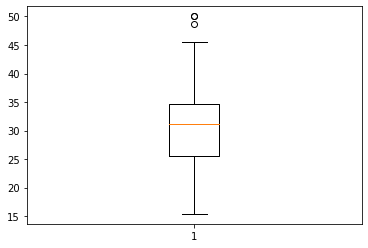

In [9]:
fig1, ax1 = plt.subplots()
ax1.boxplot(merged_df["Data_Value"])

In [23]:
quartiles = merged_df["Data_Value"].quantile([.01,.5,.99])
lowerq = quartiles[0.01]
upperq = quartiles[0.99]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: 18.04670050761421
The upper quartile is: 44.11428571428572
The interquartile range is: 26.06758520667151
The the median is: 31.074358974358972 


In [20]:
merged_df.loc[(merged_df["Data_Value"]<=18.04670050761421)]

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
715,1012335,Boulder Farmers Market,http://www.bcfm.org,www.facebook.com/Boulder-Farmers-Market-512016...,www.twitter.com/bldrfarmersmkt,NaN,www.instagram.com/boulderfarmersmarket,Canyon Boulevard and 13th Street,Boulder,Boulder,...,Y,Y,Y,Y,Y,N,N,N,7/7/16 17:32,15.383333
1121,1011460,Castro Certified Farmers' Market,http://pcfma.org,facebook.com/CastroFarmersMarket,twitter.com/PacCoastFarmers,NaN,instagram.com/pcfma,Noe St. and Market St.,San Francisco,San Francisco,...,Y,Y,N,N,Y,N,N,N,7/20/15 14:53,18.046701
1437,1012527,Clement St. Farmers Market,http://www.agriculturalinstitute.org,https://www.facebook.com/ClementStreetFarmersM...,NaN,NaN,NaN,Clement St. between 2nd and 4th,San Francisco,San Francisco,...,Y,Y,Y,Y,Y,N,N,N,7/13/16 12:38,18.046701
1798,1002739,Daly City Certified Farmers' Market at Serramo...,http://www.cafarmersmkts.com/markets/category/...,https://www.Facebook.com/DCFarmersMkt,https://twitter.com/cafarmersmkts,NaN,http://www.pinterest.com/cafarmersmkts/,Hwy 280 and Serramonte Blvd.,Daly City,San Mateo,...,Y,Y,Y,Y,Y,N,N,N,7/20/16 17:34,17.422727
1928,1011426,Divisadero Certified Farmers' Market,http://pcfma.org,facebook.com/DivisaderoFarmersMarket,twitter.com/PacCoastFarmers,NaN,instagram.com/pcfma,Grove St. and Divisadero St.,San Francisco,San Francisco,...,N,Y,N,Y,Y,N,N,N,7/20/15 12:34,18.046701
1929,1006582,Divisidero Certified Farmers' Market,http://www.pcfma.com/market_home.php?market_id=63,NaN,NaN,NaN,NaN,1326 Grove St.,San Francisco,San Francisco,...,N,N,N,N,N,N,N,N,6/13/12 13:07,18.046701
2703,1018096,Ferry Plaza Farmers Market,http://www.cuesa.org,https://www.facebook.com/CUESA/?ref=bookmarks,@cuesa,NaN,@cuesa,1 Ferry Building,San Francisco,San Francisco,...,Y,Y,Y,Y,Y,N,Y,N,6/20/17 12:57,18.046701
2805,1002741,Fort Mason Center Certified Farmers' Market,http://www.cafarmersmkts.com/markets/category/...,https://www.Facebook.com/FMCFarmersMkt,https://twitter.com/cafarmersmkts,NaN,http://www.pinterest.com/cafarmersmkts/,Marina Blvd and Buchanan Street,San Francisco,San Francisco,...,Y,Y,Y,Y,Y,N,N,N,7/20/16 17:43,18.046701
2875,1001581,Fremont Centerville Farmers Market,NaN,NaN,NaN,NaN,NaN,Bonde Way & Fremont Blvd.,Fremont,Alameda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,16.762222
2935,1007386,Full Circle Farm Stand,http://www.fullcirclesunnyvale.org,NaN,NaN,NaN,NaN,1055 Dunford Way,Sunnyvale,Santa Clara,...,N,N,N,N,N,N,N,N,5/24/12 21:21,16.900000


In [25]:
meanvalue.loc[(meanvalue["Data_Value"]<=18.04670050761421)]

,StateDesc,CityName,Data_Value
25,California,Alhambra,17.754545
47,California,Daly City,17.422727
56,California,Fremont,16.762222
68,California,Irvine,16.121622
79,California,Milpitas,15.800000
112,California,San Francisco,18.046701
120,California,Santa Clara,17.634615
128,California,Sunnyvale,16.900000
131,California,Torrance,17.953125
147,Colorado,Boulder,15.383333


In [26]:
c_merged_df= merged_df.drop(columns=["FMID","Website","Facebook","Twitter","Youtube","OtherMedia","street","updateTime",
                                   "Season1Date","Season1Time","Season2Date","Season2Time","Season3Date","Season3Time",
                                    "Season4Date","Season4Time",'Location', 'Credit', 'WIC', 'WICcash'])

In [15]:
#10%
top = c_merged_df.loc[(c_merged_df["Data_Value"]>=38.289772998805226)]
low = c_merged_df.loc[(c_merged_df["Data_Value"]<=22.525)]

In [16]:
low["Fruits"].value_counts()

Y    121
N     27
Name: Fruits, dtype: int64

In [17]:
top["Fruits"].value_counts()

Y    117
N     28
Name: Fruits, dtype: int64

In [ ]:
USDA.loc[(USDA["street"].isnull())]

In [ ]:
group_low = low.set_index("CityName").groupby("CityName")
group_top = top.set_index("CityName").groupby("CityName")

In [ ]:

group_low["Organic"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Organic in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/Organic_low.png")
plt.show()


In [ ]:
group_top["Organic"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Organic in Farmer Market of 10% of top obeisity value city")
plt.savefig("../image/Organic_top.png")
plt.show()

In [ ]:

group_low["Vegetables"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Vegetables in Farmer Market of 10% of low obeisity value city")
plt.savefig("../image/Vegetables_low.png")
plt.show()

In [ ]:
group_top["Vegetables"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Vegetables in Farmer Market of 10% of top obeisity value city")
plt.savefig("../image/Vegetables_top.png")
plt.show()

In [27]:
from config import gkey
gmaps.configure(api_key=gkey)

In [68]:
def getLoca(df):
    df = df.reset_index()
    df["lat"]=""
    df["lng"]=""
    for index, row in df.iterrows():
        target_city = row["CityName"]+","+row["StateDesc"]
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target_city, gkey)
        geo_data = requests.get(target_url).json()
        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]
        df.loc[index,"lat"]= lat
        df.loc[index,"lng"]= lng
    return df

In [66]:
#1% of obeisity
top1 = meanvalue.loc[(meanvalue["Data_Value"]>=44.11428571428572)]
low1 = meanvalue.loc[(meanvalue["Data_Value"]<=18.04670050761421)]

In [67]:
#1%
C_low1 = low1
C_top1 = top1

In [ ]:
#Add marker of 1% low in map
C_low1 = getLoca(C_low1)
locations = C_low1[["lat", "lng"]]

In [47]:

info_box_template = """
<dl>
<dt>Number</dt><dd>{Data_Value}</dd>
<dt>City</dt><dd>{CityName}</dd>
<dt>State</dt><dd>{StateDesc}</dd>
</dl>
"""
city_info = [info_box_template.format(**row) for index, row in C_low1.iterrows()]
locations = C_low1[["lat", "lng"]]

In [49]:

fig = gmaps.figure()
marker_layer = gmaps.marker_layer(locations,info_box_content=city_info)
fig.add_layer(marker_layer)


Figure(layout=FigureLayout(height='420px'))

In [52]:
#Add marker of 1% top in map
C_top1 = getLoca(C_top1)
city_info2 = [info_box_template.format(**row) for index, row in C_top1.iterrows()]
locations2 = C_top1[["lat", "lng"]]
marker_layer2 = gmaps.marker_layer(locations2,info_box_content=city_info2,display_info_box=True)

fig.add_layer(marker_layer2)


Figure(layout=FigureLayout(height='420px'))

In [53]:
#add point
top_layer = gmaps.symbol_layer(
    locations2, fill_color="red",
    stroke_color="red", scale=5
)

low_layer = gmaps.symbol_layer(
    locations, fill_color="black",
    stroke_color="black", scale=5
)
fig.add_layer(top_layer)
fig.add_layer(low_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
#Map for total number of Farmers Market in US cities
Total_farmer = pd.DataFrame(USDA.groupby(['CityName', 'StateDesc'])['FMID'].count())

In [73]:
'''Total_farmer = getLoca(Total_farmer)
over 6000 row
Total_farmer.to_csv("total.csv")'''
Total_farmer = pd.read_csv("total.csv")

In [58]:
locations = Total_farmer[["lat", "lng"]]
rating = Total_farmer["FMID"].astype(float)

In [59]:
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
#Map for 10% low with number of farmer Markte
C_low = pd.DataFrame(low1.groupby(["CityName","StateDesc"]).size())
C_low = C_low.rename(columns={0:"total"})
C_low = getLoca(C_low)

In [ ]:
locations = C_top[["lat", "lng"]]
rating = C_top["total"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

In [ ]:
#Map for 10% top with number of farmer Markte
C_top = pd.DataFrame(top.groupby(["CityName","StateDesc"]).size())
C_top = C_top.rename(columns={0:"total"})
C_top = getLoca(C_top)

In [ ]:
locations = C_top[["lat", "lng"]]
rating = C_top["total"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig

In [ ]:
#Map for Obeisity rate US
C_meanvalue = meanvalue
C_meanvalue = getLoca(C_meanvalue)

In [ ]:
locations = C_meanvalue[["lat", "lng"]]
rating = C_meanvalue["Data_Value"].astype(float)
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False,
                                 point_radius=1)
fig.add_layer(heat_layer)
fig

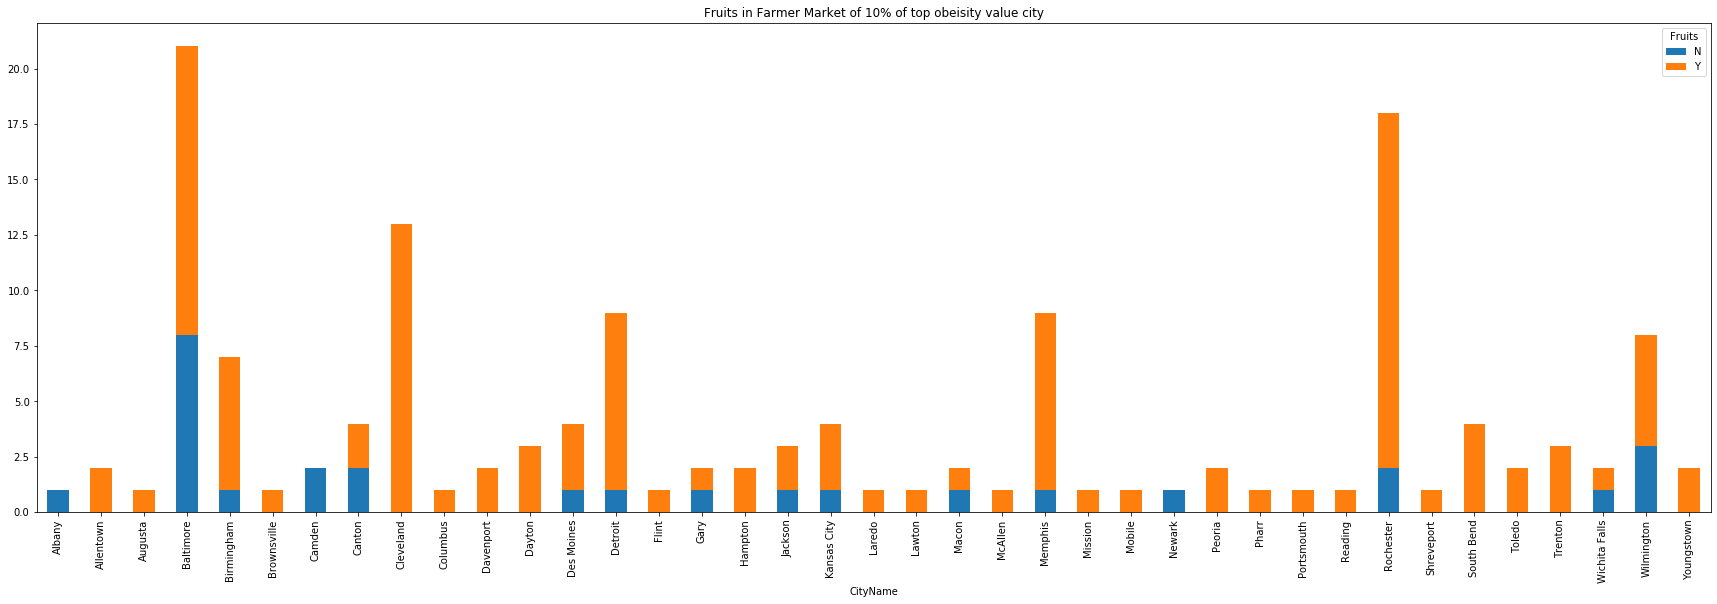

In [56]:
group_top["Fruits"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Fruits in Farmer Market of 10% of top obeisity value city")
#plt.savefig("../image/Fruits_top.png")
plt.show()

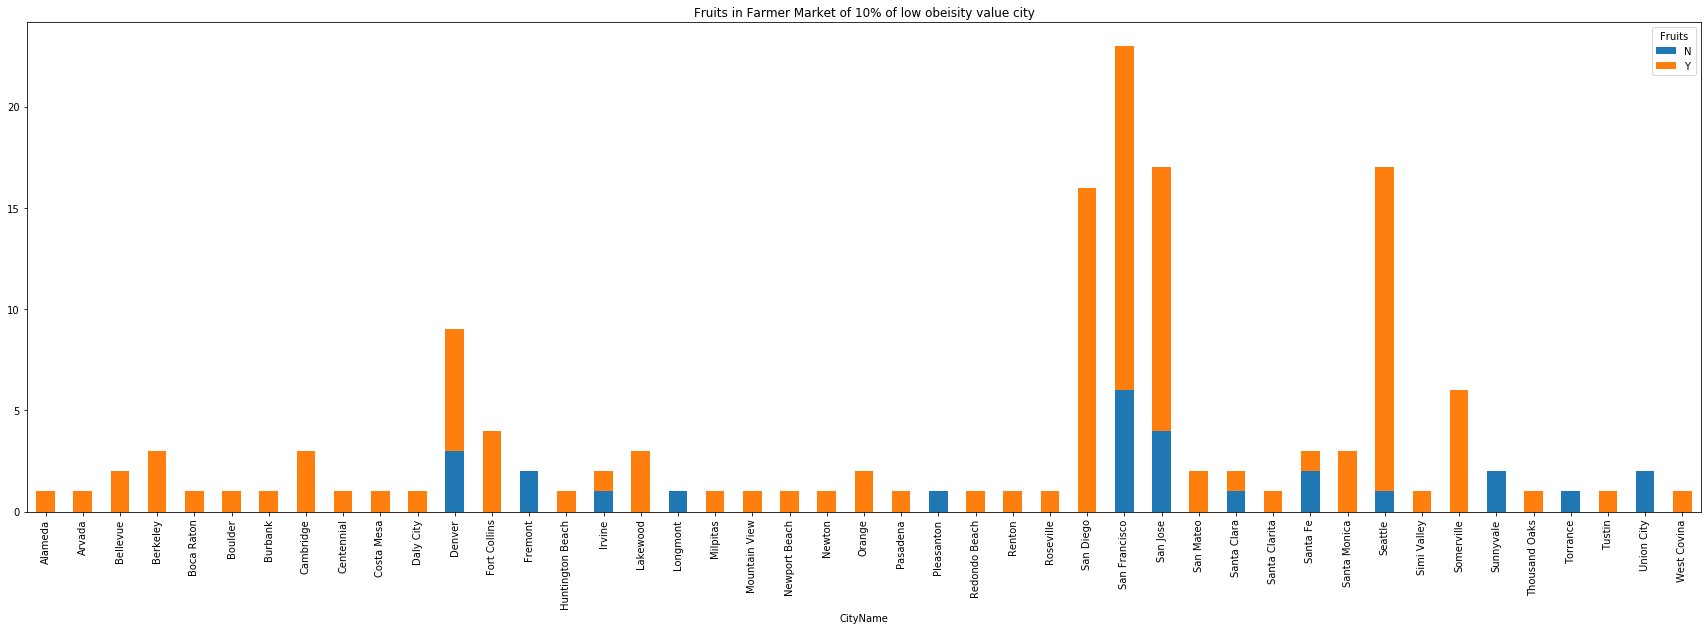

In [57]:
group_low["Fruits"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Fruits in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/Fruits_low.png")
plt.show()

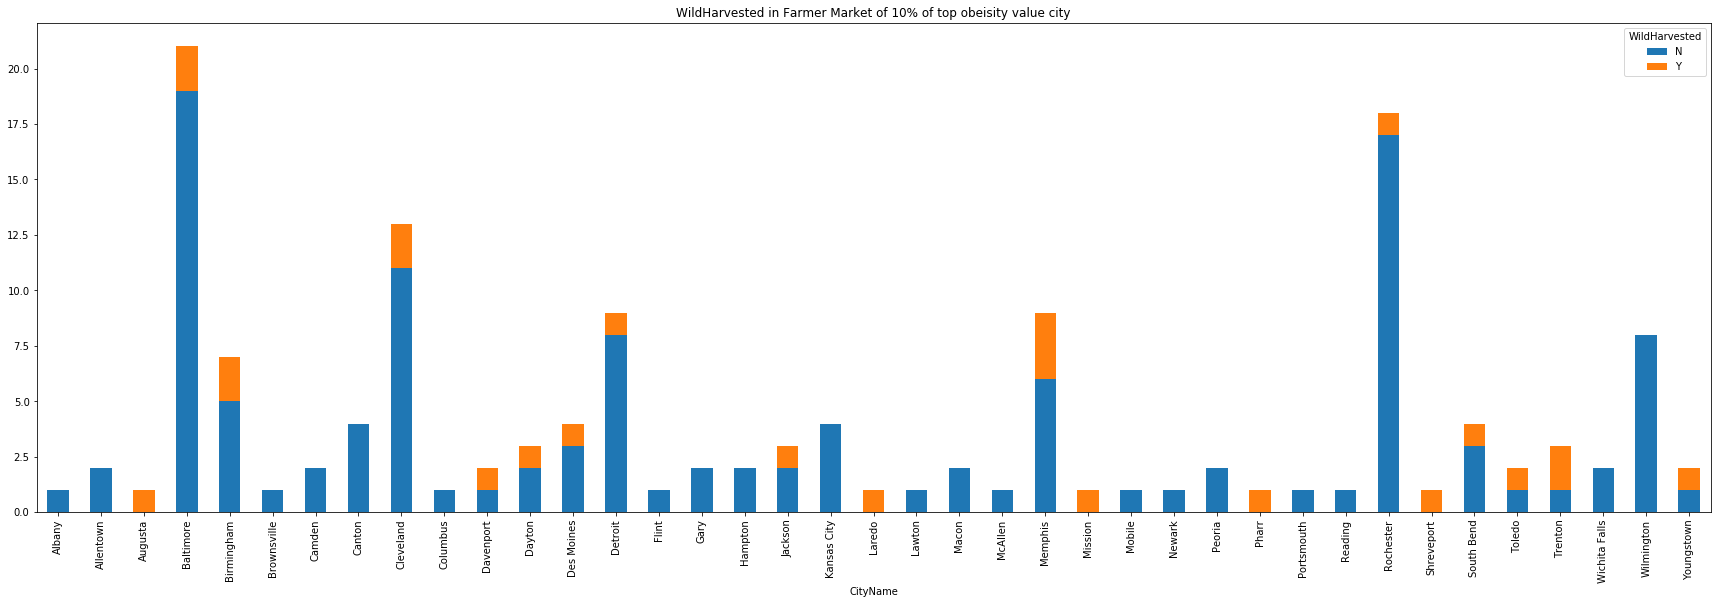

In [58]:
group_top["WildHarvested"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("WildHarvested in Farmer Market of 10% of top obeisity value city")
#plt.savefig("../image/WildHarvested_top.png")
plt.show()

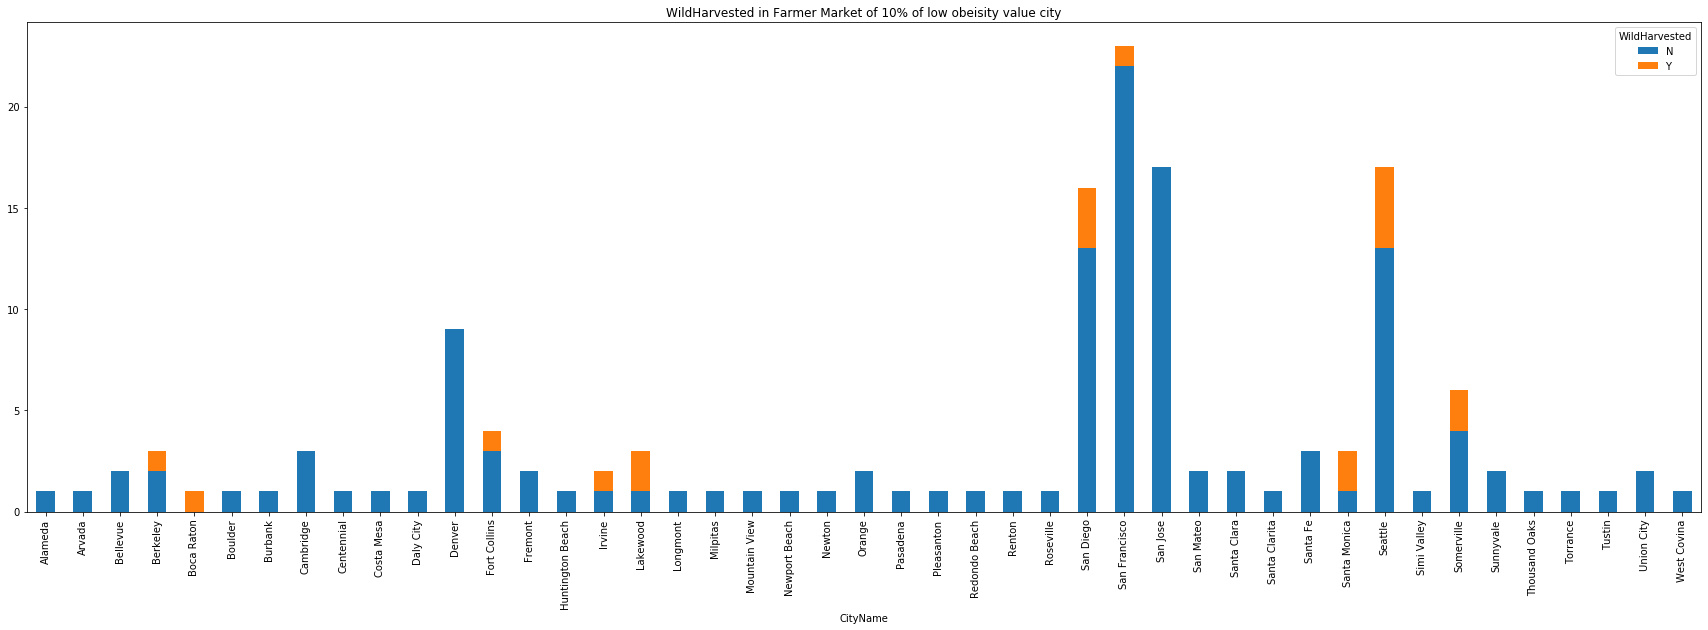

In [59]:
group_low["WildHarvested"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("WildHarvested in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/WildHarvested_low.png")
plt.show()

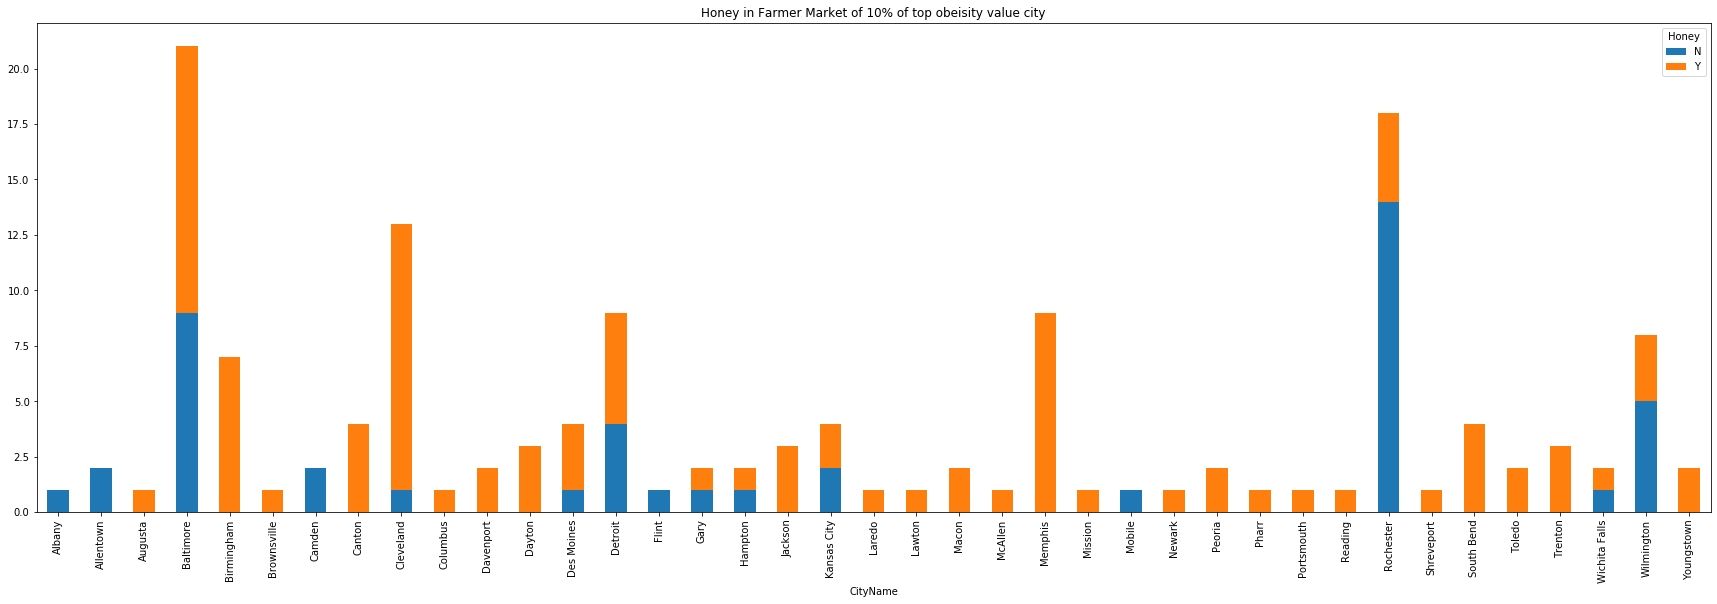

In [60]:
group_top["Honey"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Honey in Farmer Market of 10% of top obeisity value city")
#plt.savefig("../image/Honey_top.png")
plt.show()

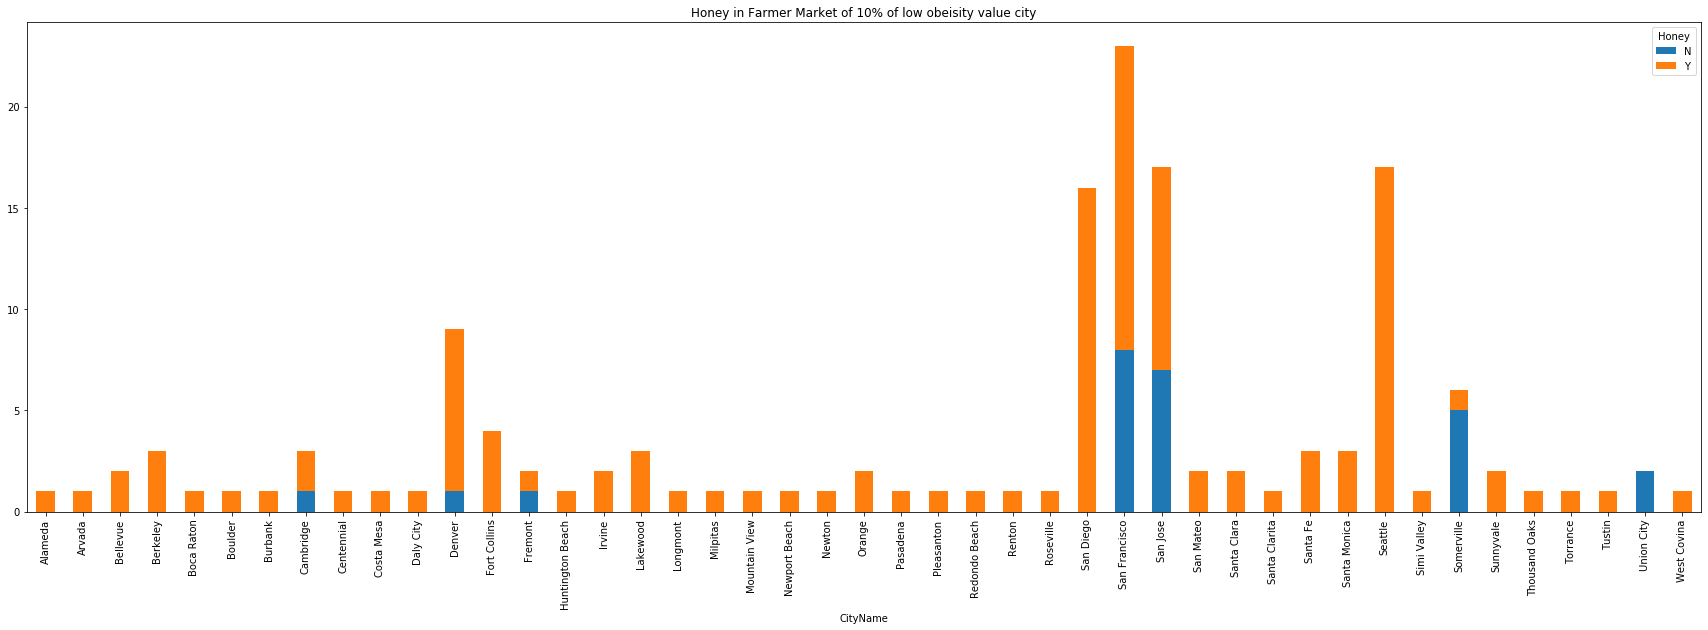

In [61]:
group_low["Honey"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Honey in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/Honey_low.png")
plt.show()

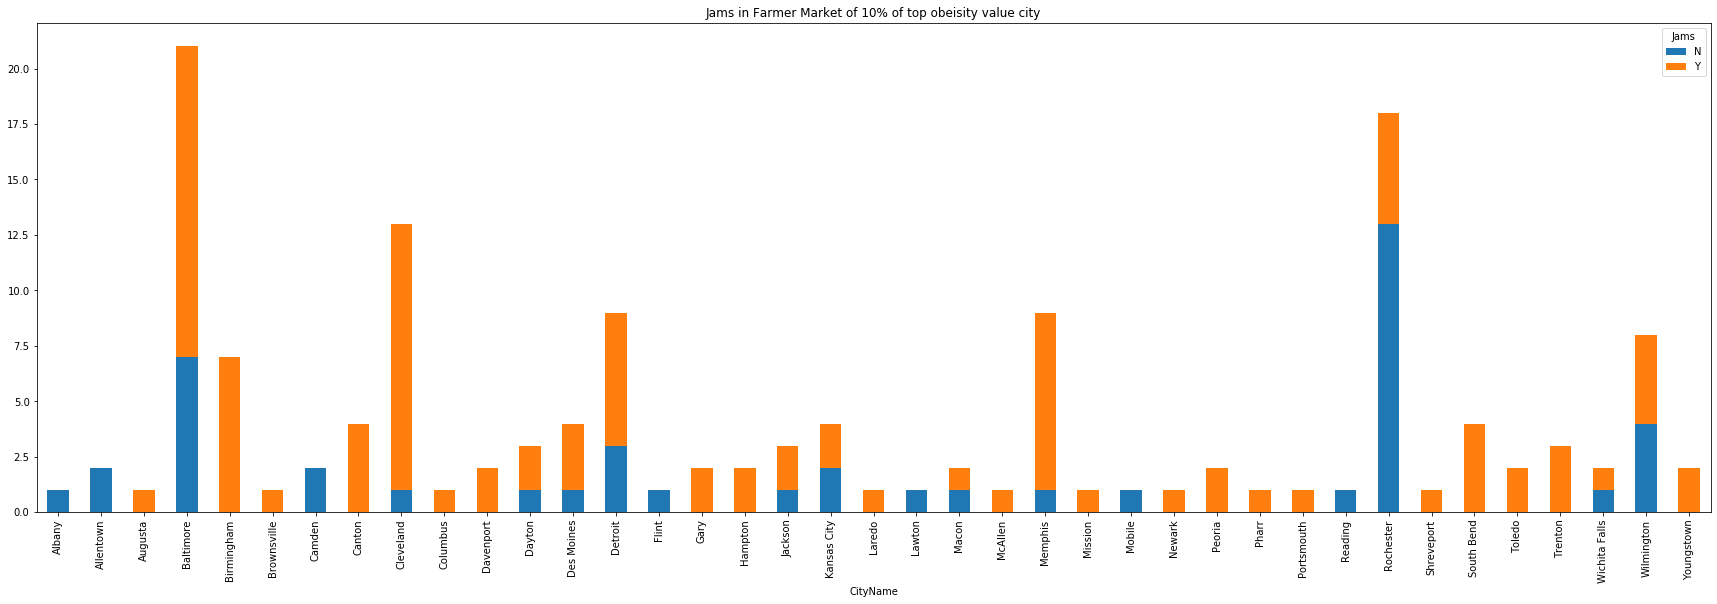

In [62]:
group_top["Jams"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Jams in Farmer Market of 10% of top obeisity value city")
#plt.savefig("../image/Jams_top.png")
plt.show()

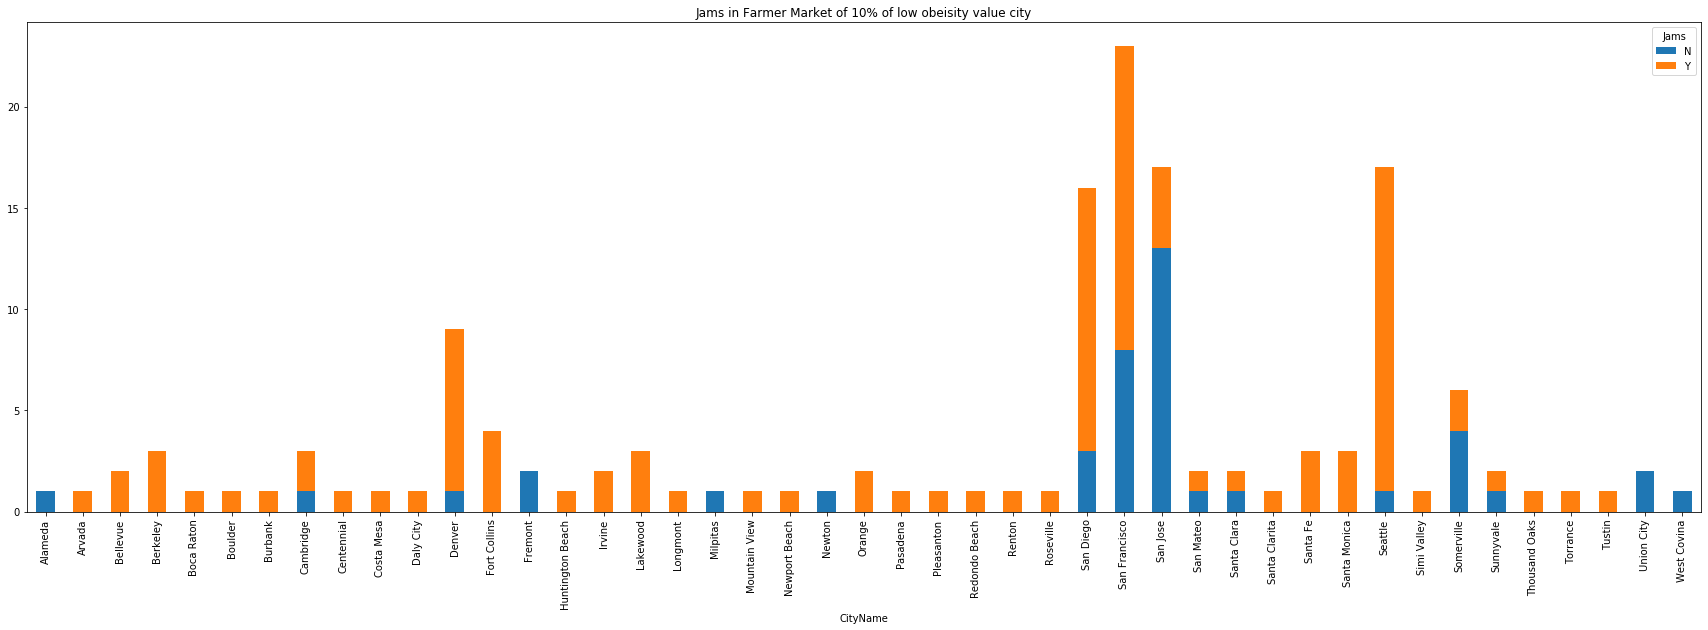

In [63]:
group_low["Jams"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Jams in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/Jams_low.png")
plt.show()

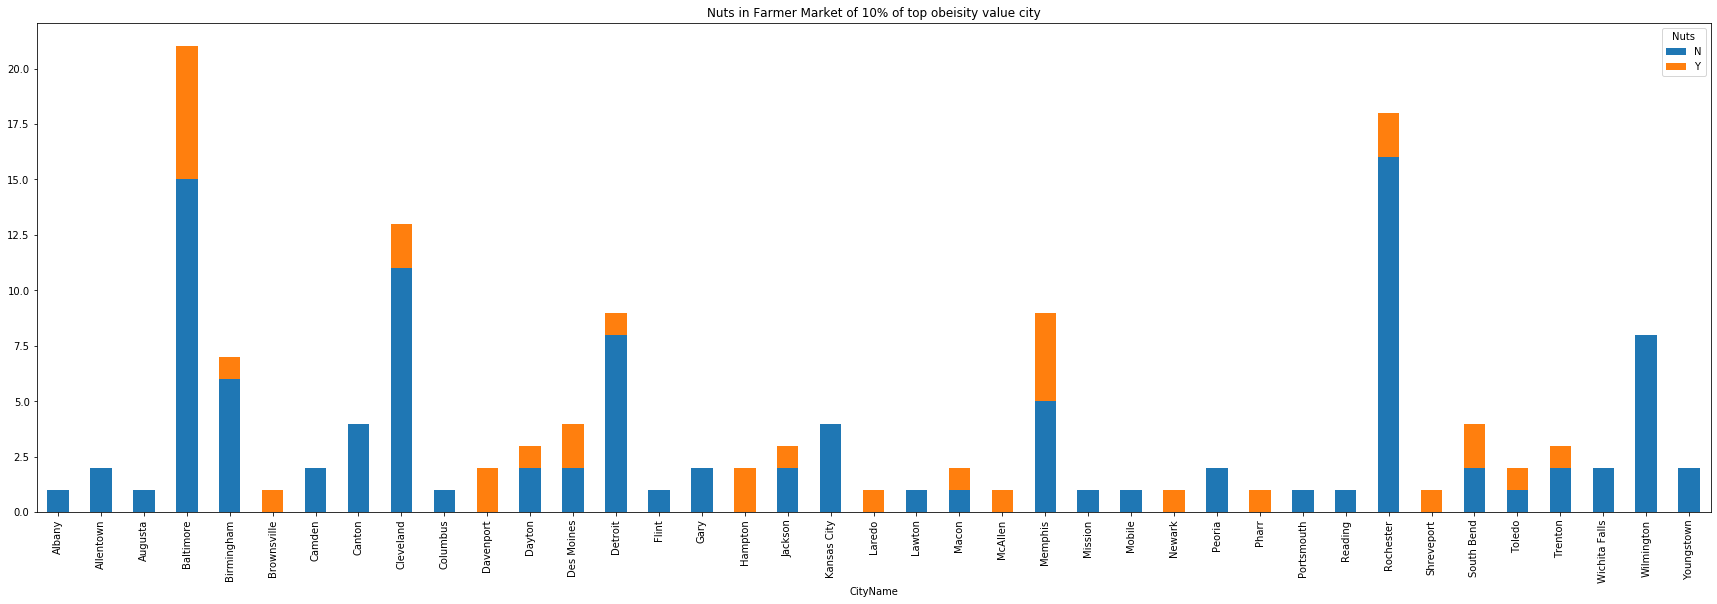

In [64]:
group_top["Nuts"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Nuts in Farmer Market of 10% of top obeisity value city")
#plt.savefig("../image/Nuts_top.png")
plt.show()

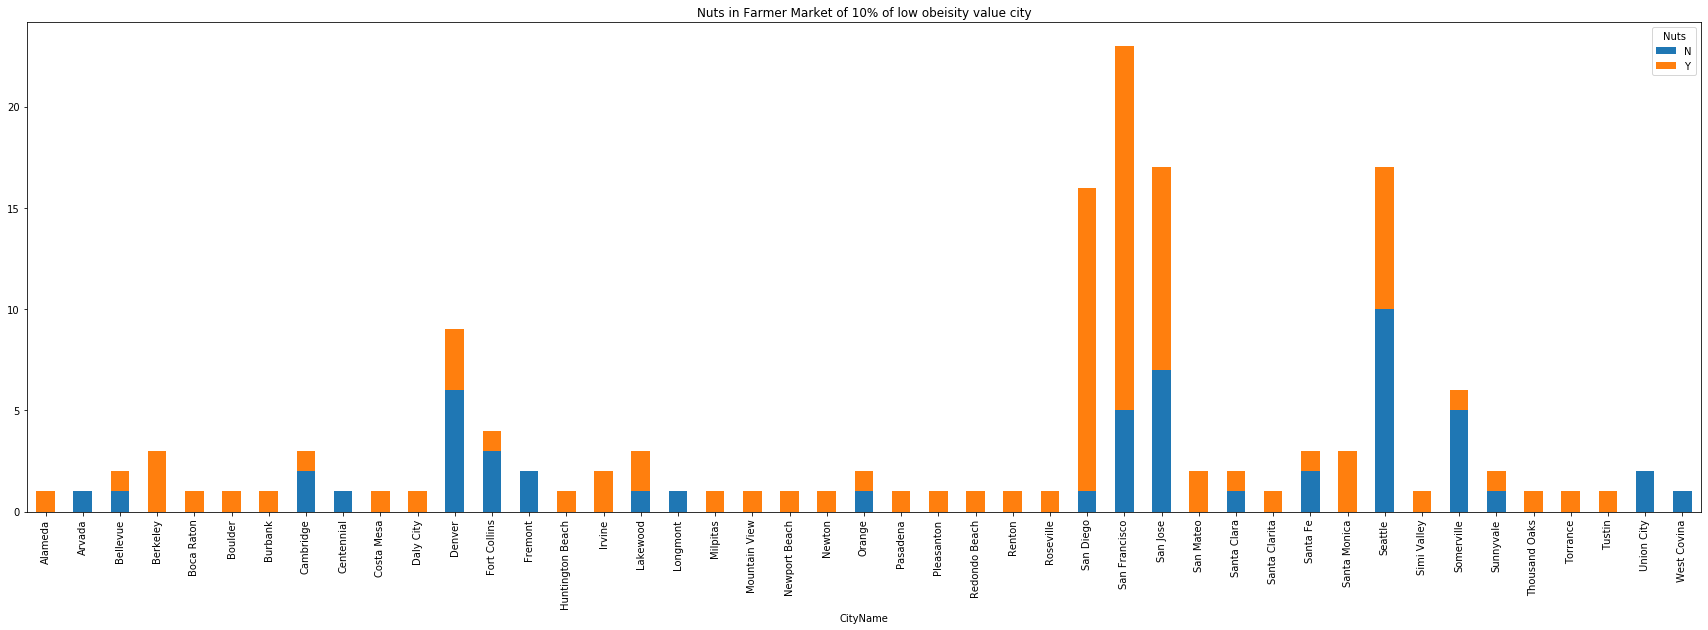

In [65]:
group_low["Nuts"].value_counts().unstack().plot.bar(stacked=True,figsize=(30,9))
plt.title("Nuts in Farmer Market of 10% of low obeisity value city")
#plt.savefig("../image/Nuts_low.png")
plt.show()

In [28]:
group = c_merged_df.set_index("CityName").groupby(["StateDesc","CityName"])

In [34]:
number = pd.DataFrame(group['MarketName'].count()).reset_index()

In [36]:
M_O_merge = pd.merge(number, meanvalue, on=["StateDesc","CityName"])

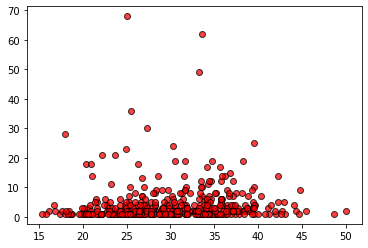

In [38]:
plt.scatter(M_O_merge["Data_Value"], M_O_merge["MarketName"], marker="o", facecolors="red", edgecolors="black",alpha=0.75)

The correlation between MarketName and Data_Value is 0.05


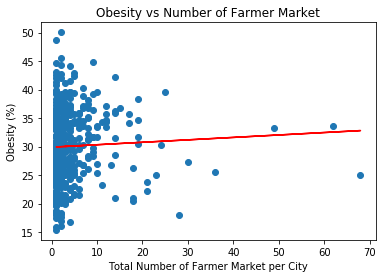

In [71]:
#scatter plot
x_value = M_O_merge["MarketName"]
y_value = M_O_merge["Data_Value"]
correlation = st.pearsonr(x_value,y_value)
print(f"The correlation between MarketName and Data_Value is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_value,y_value)
regress_value = x_value*slope+intercept
plt.scatter(x_value,y_value)
plt.plot(x_value, regress_value, "r-")
'''line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.annotate(line_eq,(min(x_value),min(y_value)),fontsize=15,color="red")'''
#plt.text(.5,.5,f"The correlation is {round(correlation[0],2)}")
plt.title("Obesity vs Number of Farmer Market")
plt.xlabel("Total Number of Farmer Market per City")
plt.ylabel("Obesity (%)")
#plt.savefig("../image/Scatter_OF.png")
plt.show()